<a href="https://colab.research.google.com/github/davidpastuszek/nn/blob/main/nn_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Aktivační fce

In [2]:
def sigmoid(z):
  return np.where(z<0, np.exp(z)/(1+np.exp(z)), 1/(1+np.exp(-z))) # je treba osetrit extremni hodnoty

def sigmoid_der(x):
  return np.vectorize(lambda y: y*(1-y))(x) # potrebuju pro kazdy prvek arraye (sigmoidu - derivace sigmoidu je sigm * (1- sigm ))

Ztrátová fce

In [3]:
def ztratova_fce(e):
  return sum(e**2)

def ztratova_der(e):
  return -1 * (2*e)

Neuronová síť

In [14]:
class sit:
    def __init__(self, x, y, p_neuronu, act_fce, der_act, loss_fce, der_loss):
        self.x = x
        self.y = y
        self.pn = p_neuronu
        self.ni = np.shape(x)[0]
        self.nj = np.shape(x)[1] # pocet radek na vstupu
        self.act_fce = act_fce
        self.der_act = der_act
        self.loss_fce = loss_fce
        self.der_loss = der_loss
        self.LR = 1
        # init vah:
        self.vahy1 = (np.random.rand(self.nj, self.pn)+0.5)/self.pn
        self.vahy2 = (np.random.rand(self.pn, 1)+0.5)/self.pn
        
        self.forward_prop()
        
    def forward_prop(self):
        self.LO1 = self.act_fce(np.matmul(self.x, self.vahy1))
        self.y_hat = self.act_fce(np.matmul(self.LO1, self.vahy2))
        self.e = self.y - self.y_hat
        
    def backward_prop(self):
            self.delta2 = np.matmul(np.transpose(self.LO1), (self.der_loss(self.e)*self.der_act(self.y_hat)))
            self.delta1 = np.matmul(np.transpose(self.x),
                                   np.matmul((self.der_loss(self.e) *  self.der_act(self.y_hat)),
                                            np.transpose(self.vahy2)) * self.der_act(self.LO1))
            self.vahy1 = self.vahy1 - self.delta1 * self.LR
            self.vahy2 = self.vahy2 - self.delta2 * self.LR
        
    def forecast(self, X_new):
        self.Lf = self.act_fce(np.matmul(X_new, self.vahy1))
        self.predict = self.act_fce(np.matmul(self.Lf, self.vahy2))
        return self.predict
    
    def train(self, n_epochs, LR):
        self.LR = LR
        self.n_epochs = n_epochs
        self.training = np.zeros(n_epochs)
        
        for i in range(self.n_epochs):
            self.backward_prop()
            self.forward_prop()
            #informace pro mě dal:
            self.training[i] = self.loss_fce(self.e)
            if i % 50 ==0:
                print(f"{i}. iterace, ztrata: {self.training[i]:.2f}")

In [15]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

nase_sit = sit(X,Y, 2, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)

In [16]:
nase_sit.train(10000, 0.1)

0. iterace, ztrata: 1.08
50. iterace, ztrata: 1.00
100. iterace, ztrata: 1.00
150. iterace, ztrata: 1.00
200. iterace, ztrata: 1.00
250. iterace, ztrata: 1.00
300. iterace, ztrata: 1.00
350. iterace, ztrata: 1.00
400. iterace, ztrata: 1.00
450. iterace, ztrata: 1.00
500. iterace, ztrata: 1.00
550. iterace, ztrata: 1.00
600. iterace, ztrata: 1.00
650. iterace, ztrata: 1.00
700. iterace, ztrata: 1.00
750. iterace, ztrata: 1.00
800. iterace, ztrata: 1.00
850. iterace, ztrata: 1.00
900. iterace, ztrata: 1.00
950. iterace, ztrata: 1.00
1000. iterace, ztrata: 1.00
1050. iterace, ztrata: 0.99
1100. iterace, ztrata: 0.99
1150. iterace, ztrata: 0.99
1200. iterace, ztrata: 0.99
1250. iterace, ztrata: 0.99
1300. iterace, ztrata: 0.99
1350. iterace, ztrata: 0.98
1400. iterace, ztrata: 0.98
1450. iterace, ztrata: 0.98
1500. iterace, ztrata: 0.97
1550. iterace, ztrata: 0.96
1600. iterace, ztrata: 0.96
1650. iterace, ztrata: 0.95
1700. iterace, ztrata: 0.94
1750. iterace, ztrata: 0.93
1800. iterace, 

In [25]:
import pandas as pd
data = pd.read_csv("mtcars.csv", sep=";")

Y = np.array(data["mpg"])
X = np.array(data.loc[:,data.columns != "mpg"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

0. iterace, ztrata: 2.07
50. iterace, ztrata: 1.79
100. iterace, ztrata: 0.62
150. iterace, ztrata: 0.42
200. iterace, ztrata: 0.39
250. iterace, ztrata: 0.37
300. iterace, ztrata: 0.35
350. iterace, ztrata: 0.34
400. iterace, ztrata: 0.32
450. iterace, ztrata: 0.31
500. iterace, ztrata: 0.30
550. iterace, ztrata: 0.29
600. iterace, ztrata: 0.28
650. iterace, ztrata: 0.27
700. iterace, ztrata: 0.26
750. iterace, ztrata: 0.26
800. iterace, ztrata: 0.25
850. iterace, ztrata: 0.24
900. iterace, ztrata: 0.24
950. iterace, ztrata: 0.24
1000. iterace, ztrata: 0.23
1050. iterace, ztrata: 0.23
1100. iterace, ztrata: 0.23
1150. iterace, ztrata: 0.23
1200. iterace, ztrata: 0.23
1250. iterace, ztrata: 0.23
1300. iterace, ztrata: 0.22
1350. iterace, ztrata: 0.22
1400. iterace, ztrata: 0.22
1450. iterace, ztrata: 0.22
1500. iterace, ztrata: 0.22
1550. iterace, ztrata: 0.22
1600. iterace, ztrata: 0.22
1650. iterace, ztrata: 0.22
1700. iterace, ztrata: 0.22
1750. iterace, ztrata: 0.22
1800. iterace, 

0.08571265745601292

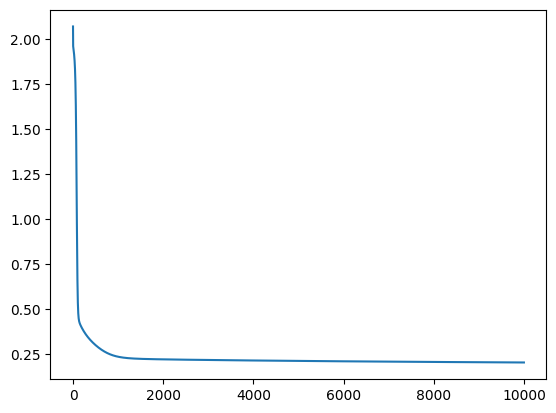

In [27]:
ymin = min(Y)
ymax = max(Y)

auta = sit(Xs, Ys, 6, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
auta.train(10000, 0.1)

plt.plot(auta.training)

fit = auta.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(Y-fit)/Y)

Dating

In [28]:
data = pd.read_csv("dating.csv")

In [29]:
data

,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,...,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,like,guess_prob_liked,met,decision,match
0,21,23,0,2,4,30.0,5.0,15.0,40.0,5.0,...,8.0,7.0,6.0,8.0,0.61,7.0,6.0,0,1,1
1,21,24,0,2,4,30.0,10.0,20.0,10.0,10.0,...,7.0,7.0,6.0,6.0,0.21,6.0,6.0,0,1,1
2,21,28,0,2,4,50.0,0.0,25.0,10.0,0.0,...,8.0,9.0,8.0,8.0,0.28,7.0,7.0,0,1,1
3,24,23,1,2,5,30.0,5.0,15.0,40.0,5.0,...,7.0,6.0,5.0,7.0,-0.21,7.0,8.0,0,1,1
4,24,28,1,2,5,50.0,0.0,25.0,10.0,0.0,...,8.0,9.0,4.0,5.0,0.11,5.0,6.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,26,33,0,6,1,20.0,10.0,20.0,15.0,15.0,...,8.0,2.0,5.0,2.0,0.20,5.0,2.0,0,0,0
1982,22,30,0,6,2,14.0,18.0,16.0,18.0,18.0,...,10.0,8.0,8.0,4.0,-0.16,5.0,3.0,0,0,0
1983,30,22,0,2,2,17.0,10.0,18.0,20.0,25.0,...,6.0,6.0,4.0,5.0,-0.28,7.0,6.0,0,1,0
1984,21,23,1,8,7,25.0,5.0,30.0,15.0,5.0,...,10.0,10.0,10.0,10.0,-0.13,10.0,10.0,0,1,0


0. iterace, ztrata: 593.62
50. iterace, ztrata: 192.76
100. iterace, ztrata: 162.82
150. iterace, ztrata: 126.12
200. iterace, ztrata: 98.67
250. iterace, ztrata: 95.12
300. iterace, ztrata: 110.46
350. iterace, ztrata: 89.16
400. iterace, ztrata: 92.04
450. iterace, ztrata: 97.42
500. iterace, ztrata: 95.54
550. iterace, ztrata: 86.19
600. iterace, ztrata: 90.98
650. iterace, ztrata: 97.98
700. iterace, ztrata: 93.77
750. iterace, ztrata: 92.16
800. iterace, ztrata: 90.74
850. iterace, ztrata: 89.47
900. iterace, ztrata: 88.33
950. iterace, ztrata: 87.29
1000. iterace, ztrata: 86.33
1050. iterace, ztrata: 85.43
1100. iterace, ztrata: 84.55
1150. iterace, ztrata: 83.70
1200. iterace, ztrata: 82.85
1250. iterace, ztrata: 82.02
1300. iterace, ztrata: 81.20
1350. iterace, ztrata: 80.40
1400. iterace, ztrata: 79.61
1450. iterace, ztrata: 78.83
1500. iterace, ztrata: 78.08
1550. iterace, ztrata: 77.35
1600. iterace, ztrata: 76.64
1650. iterace, ztrata: 75.95
1700. iterace, ztrata: 75.29
175

<ipython-input-34-9439fa285dd6>:23: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(y_train-fit)/y_train)


inf

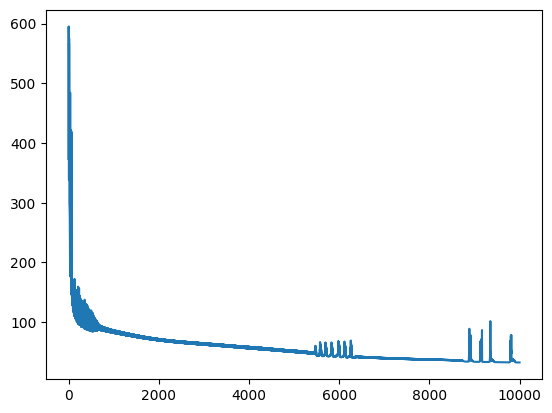

In [34]:
from sklearn.model_selection import train_test_split

X = np.array(data.loc[:, data.columns != "match"])
Y = np.array(data["match"])

Y.resize([len(Y), 1])
Y.shape

Ys = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, Y)
Xs = np.apply_along_axis(lambda x: (x-min(x))/(max(x)-min(x)), 0, X)

X_train, X_test, y_train, y_test = train_test_split(
    Xs, Ys, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

dating = sit(X_train, y_train, 6, sigmoid, sigmoid_der, ztratova_fce, ztratova_der)
dating.train(10000, 0.01)

plt.plot(dating.training)

fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)


In [36]:
fit = dating.y_hat*(ymax-ymin)+ymin
np.mean(np.abs(y_train-fit)/y_train)

<ipython-input-36-739c852d64c5>:2: RuntimeWarning: divide by zero encountered in true_divide
  np.mean(np.abs(y_train-fit)/y_train)


inf